In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-02-29 00:06'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})

In [5]:
df_latest

,datetime,headline
0,2020-02-29 00:06,Trump says he will nominate Rep. John Ratcliff...
1,2020-02-29 00:06,Kudlow says Trump will get reelection boost fr...
2,2020-02-29 00:06,Coronavirus live updates: Coronavirus risk upg...
3,2020-02-29 00:06,Congress Cannot Sue to Enforce Subpoenas Defie...
4,2020-02-29 00:06,Mike Bloomberg says he's running for president...
5,2020-02-29 00:06,CNN polls: Bernie Sanders holds big leads in C...
6,2020-02-29 00:06,Appeals court halts Trump policy requiring asy...
7,2020-02-29 00:06,"Pence tells Rush Limbaugh, who said coronaviru..."
8,2020-02-29 00:06,House approves bill to ban the sale of flavore...
9,2020-02-29 00:06,Republicans storm out of coronavirus briefing ...


In [6]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [7]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [8]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [9]:
# is_virus is 1 if there is reference to coronavirus
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if ('coronavirus' in v.lower()) or ('covid-19' in v.lower())
           else 0)
)

In [10]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [11]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
7,"Pence tells Rush Limbaugh, who said coronaviru..."
9,Republicans storm out of coronavirus briefing ...
11,Coronavirus in Iran prompts US to extend olive...
34,"After missteps, CDC says its coronavirus test ..."
36,Santa Clara County Confirms New Case of Corona...


In [12]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [13]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-02-29 00:06:00,2020-02-29 00:06,Tom Brady Drops Encouraging Comment On N’Keal ...,0,201
2020-02-29 00:06:00,2020-02-29 00:06,"Henry Ruggs Separates Himself, Justin Herbert ...",0,201
2020-02-29 00:06:00,2020-02-29 00:06,Boeing's Starliner spacecraft is built to carr...,0,201


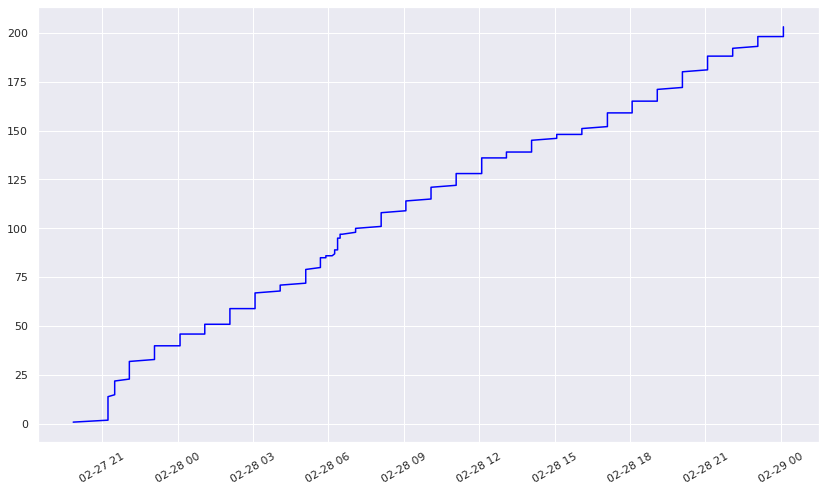

In [14]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [15]:
fig.savefig(png_file)
